# Линейная регрессия


$$
x_n =
\begin{cases} 1, & \text{если n четное} n \text{} \\
\frac{1}{n}, & \text{если } n \text{ нечетное}
\end{cases}
$$

x_n =
\begin{cases} 1, & \text{если } n \text{ четное} \\
\frac{1}{n}, & \text{если } n \text{ нечетное}
\end{cases}

$$
\begin{cases} 1
$$



```
`# This is formatted as code`
```

Линейные методы предполагают, что между признаками объекта и целевой переменной существует линейная зависимость, то есть:
$$ \hat{y} = w_1 x_1 + w_2 x_2 + ... + w_k x_k + b,$$
где $\hat{y}$ - целевая переменная (что мы хотим предсказать), $x_i$ - i-ый признак объекта $x$, $w_i$ - вес $i$-го признака, $b$ - bias (смещение, свободный член).

В задаче линейной регрессии $\hat{y}$ - это действительное число.

Часто для упрощения записи вводят дополнительный фиктивный признак $x_0$, который всегда равен 1, тогда bias - вес этого признака. В этом случае формула может быть записана как скалярное произведение:
$$ \hat{y} = <w, x> $$

В матричной форме формулу можно переписать следующим образом:
$$ \hat{y} = Xw,$$
$\hat{y}$ - вектор значений целевой переменной размера $n$, $X$ - матрица значений признаков объектов размера $n \times k$, w - вектор весов размера $k$. То есть в наших данных имеется $n$ объектов, каждый их которых описан $k$ признаками.

Таким образом, в матричной форме модель задаётся следующим образом:
$$ y = Xw + \epsilon$$ 

Важно отметить, что параметрами этой модели являются веса $w$. Когда говорят об обучении какого-либо алгоритма машинного обучения, как правило, имеют в виду настройку весов, т.е. параметров модели.  

На практике $\hat{y} $ может отличается от реальных значений, которые принимает целевая переменная $y$. Разницу между реальным значением и предсказанным, обозначим как $\epsilon$ - вектор значений случайной переменной, соответствующая случайной, непрогнозируемой ошибке модели. Ограничения, которые накладываются на эту модель:
* математическое ожидание случайных ошибок $\epsilon$ равно нулю,
* дисперсия случайных ошибок одинакова и конечна,
* случайные ошибки не скоррелированы.

Один из способов вычислить значения параметров модели, давно знаком - это наименьших квадратов, который минимизирует среднеквадратичную ошибку между реальным значением зависимой переменной и прогнозом, выданным моделью. Решение по методу наименьших квадратов дает:
$$ w = (X^TX)^{-1}X^TY $$

Загрузим необходимые библиотеки

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

np.random.seed(42)

## Оценка результатов

Чтобы оценить качество работы алгоритма нам необходимо применяют разные метрики. Наиболее частые метрики средневадратичная и средняя абсолютная ошибки. Вычислим эти метрики на обучающей и на тестовой выборках. 

 * *mean_absolute_error* - средняя абсолютная ошибка $|y_i - \hat{y}_i|$
 * *mean_squared_error* - средняя квадратичная ошибка $(y_i - \hat{y}_i)^2$

## Задание 3.1

Пример 1. Сгенерируем искусственные данные. Сначала поработаем с простейшим одномерным случаем, когда у нас значение $y$ будет зависеть только от одного значения $x$.




In [ ]:
def generate_data(n_points=20):
  """
    Принимает на вход n_points точек 
    Возвращает данные для обучения и теста
  """
  X = np.linspace(-5, 5, n_points)
  y = 10 * X - 7

  X_train = X[0::2].reshape(-1, 1)
  y_train = y[0::2] + np.random.randn(int(n_points/2)) * 10

  X_test = X[1::2].reshape(-1, 1)
  y_test = y[1::2] + np.random.randn(int(n_points/2)) * 10

  print(f'Generated {len(X_train)} train samples and {len(X_test)} test samples')
  return X, X_train, y_train, X_test, y_test

In [ ]:
X, X_train, y_train, X_test, y_test = generate_data(100)

Generated 50 train samples and 50 test samples


In [ ]:
### Реализуйте настройку w и b с помощью рассмотренного выше метода наименьших квадратов.
### Найдите значения метрик MSE и MAE. Сравните с результатами из sklearn

In [ ]:
def myMAE(y_true, y_pred):
  n = y_true.size
  
  return 1/n * np.abs(y_true - y_pred).sum()

def myMSE(y_true, y_pred):
  n = y_true.size

  return 1/n * (np.abs(y_true - y_pred)**2).sum()

In [ ]:
class MyLinearRegressionClassifier(object):
  def __init__(self, fit_intercept=True):
    self.fit_intercept = fit_intercept

  def fit(self, X_train, y_train):
    n, k = X_train.shape

    if self.fit_intercept:
      X_train = np.hstack((X_train, np.ones((n, 1))))

    self.w = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train

    return self

  def predict(self, X):
    n, k = X.shape

    if self.fit_intercept:
      X = np.hstack((X, np.ones((n, 1))))

    y = X @ self.w
    
    return y

  def coef(self):
    return self.w


In [ ]:
my_reg = MyLinearRegressionClassifier()
my_reg.fit(X_train, y_train)

b = my_reg.coef()[-1]
w = my_reg.coef()[:-1]
print(f'b = {b}\nw = {w}')

b = -9.284322419649065
w = [9.41424933]


In [ ]:
train_pred = my_reg.predict(X_train)
test_pred = my_reg.predict(X_test)

print('Train myMAE: ', myMAE(y_train, train_pred))
print('Test myMAE: ', myMAE(y_test, test_pred))
print()
print('Train myMSE: ', myMSE(y_train, train_pred))
print('Test myMSE: ', myMSE(y_test, test_pred))

Train myMAE:  7.411769439504444
Test myMAE:  7.1778089685417825

Train myMSE:  82.51417951111574
Test myMSE:  80.97492655819141


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
print('Train myMAE: ', mean_absolute_error(y_train, train_pred))
print('Test myMAE: ', mean_absolute_error(y_test, test_pred))
print()
print('Train myMSE: ', mean_squared_error(y_train, train_pred))
print('Test myMSE: ', mean_squared_error(y_test, test_pred))

Train myMAE:  7.411769439504444
Test myMAE:  7.177808968541782

Train myMSE:  82.51417951111574
Test myMSE:  80.97492655819141


## Задание 3.2

Пример 2. Не всегда в задаче регрессии в качестве решения выступает прямая, как в предыдущем случае. Рассмотрим ещё один пример, в котором у объектов всё ещё один признак. Но теперь мы будм брать случайную точку на синусоиде и добавлять к ней шум — таким образом получим целевую переменную, признаком в этом случае будет координата $x$.

In [ ]:
def generate_wave_set(n_support=1000, n_train=25, std=0.3):
    data = {}
    # выберем некоторое количество точек из промежутка от 0 до 2*pi
    data['support'] = np.linspace(0, 2*np.pi, num=n_support)
    # для каждой посчитаем значение sin(x) + 1
    # это будет ground truth
    data['values'] = np.sin(data['support']) + 1
    # из support посемплируем некоторое количество точек с возвратом, это будут признаки
    data['x_train'] = np.sort(np.random.choice(data['support'], size=n_train, replace=True))
    # опять посчитаем sin(x) + 1 и добавим шум, получим целевую переменную
    data['y_train'] = np.sin(data['x_train']) + 1 + np.random.normal(0, std, size=data['x_train'].shape[0])
    return data

data = generate_wave_set(1000, 250)

In [ ]:
### попробуйте реализовать настройку w и b с помощью рассмотренного выше метода наименьших квадратов.
### Найдите значения метрик MSE и MAE

In [ ]:
X_train_3_2 = np.asarray(data['x_train']).reshape(-1, 1)
y_train_3_2 = np.asarray(data['y_train'])

my_reg_3_2 = MyLinearRegressionClassifier()
my_reg_3_2.fit(X_train_3_2, y_train_3_2)

b = my_reg_3_2.coef()[-1]
w = my_reg_3_2.coef()[:-1]
print(f'b = {b}\nw = {w}')

b = 1.9995553679343008
w = [-0.30593638]


In [ ]:
train_pred = my_reg.predict(data['x_train'].reshape(-1, 1))

print('Train myMAE: ', myMAE(data['y_train'].reshape(-1, 1), train_pred))
print()
print('Train myMSE: ', myMSE(data['y_train'].reshape(-1, 1), train_pred))

Train myMAE:  5202.870031775709

Train myMSE:  166432.51573062965


In [ ]:
def def_y_3_2(x):
  return (my_reg_3_2.coef()[0] * x + my_reg_3_2.coef()[-1])

x_line_3_2 = np.linspace(-2, 2 + 2*np.pi, 100)
y_line_3_2 = def_y_3_2(x_line_3_2)

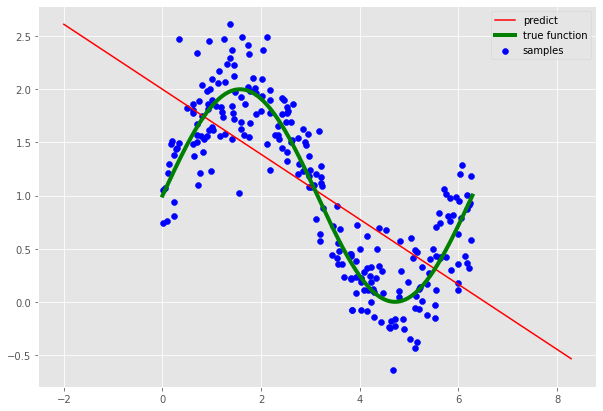

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(x_line_3_2, y_line_3_2, label='predict', c='r')
plt.plot(data['support'], data['values'], label='true function', c='g', linewidth=4)
plt.scatter(data['x_train'], data['y_train'], label='samples', c='b')

plt.legend(loc='best')
plt.show()

Конечно, такое решение нас вряд ли может устроить. Нужно применить полинимиальную регрессию. Идея здесь такая. Каждый признак в исходную формулу может входить не только в первой степени, но и во второй, в третьей и так далее. То есть для случая, когда у нас только один признак:
$$ \hat{y} = w_1 x_1 + w_2 x_1^2 + ... + w_k x_1^k + b,$$ 

## Задание 3.3

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

### Реализуйте полиномиальную регрессию. Сделайте визуализацию для полиномов разных степеней. 
### Полином какой степени подходит больше других? Почему?

Best degree = 11



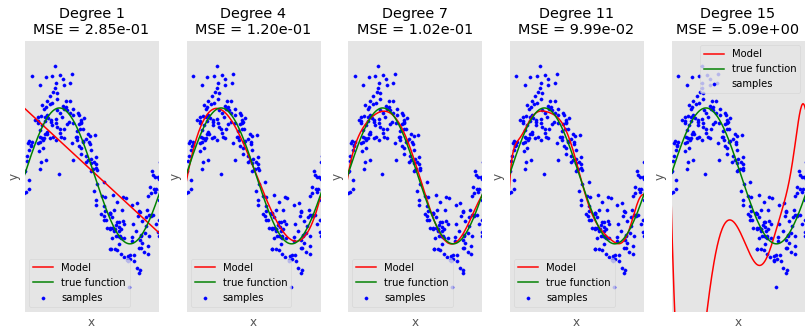

In [ ]:
#degrees = np.array(list(range(1, 15)))
degrees = [1, 4, 7, 11, 15]

#arr_mse = np.array([])

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
  ax = plt.subplot(1, len(degrees), i + 1)
  plt.setp(ax, xticks=(), yticks=())

  pf = PolynomialFeatures(degree=degrees[i], 
                          include_bias=False) 
  
  my_reg_3_3 = MyLinearRegressionClassifier()
  my_reg_3_3.fit(pf.fit_transform(X_train_3_2), y_train_3_2)

  X_test_3_3 = (np.linspace(0, 6, len(y_train_3_2))).reshape(-1, 1)
  pf.fit_transform(X_test_3_3)

  y_pred_3_3 = my_reg_3_3.predict(pf.fit_transform(X_test_3_3))
  plt.plot(X_test_3_3, y_pred_3_3, c='r', label="Model")
  plt.plot(data['support'], data['values'], label='true function', c='g')
  plt.scatter(data['x_train'], data['y_train'], label='samples', c='b', s=10)


  plt.xlabel("x")
  plt.ylabel("y")
  plt.xlim((0, 6))
  plt.ylim((-1, 3))
  plt.legend(loc='best')

  mse = myMSE(y_train_3_2, y_pred_3_3)
  plt.title("Degree {}\nMSE = {:.2e}".format(
      degrees[i], mse
  ))

  #arr_mse = np.append(arr_mse, mse)
  
#print(arr_mse)
print('Best degree = 11\n')
plt.show()

In [ ]:
#plt.plot(list(range(1, 15)), arr_mse, c='r')

# Реальный датасет

Возьмём реальный набор данных Boston из sklearn.datasets. Этот датасет описывает средние цены на недвижимость в районах Бостона в тысячах долларов.

Примеры признаков объектов недвижимости: количество преступлений на душу населения, процент старых домов в районе, количество учеников на одного учителя и т.д. Обратите внимание на то, что данные уже оцифрованы там, где изначально признаки были качественными.

Загрузим датасет, выведем информацию

In [ ]:
from sklearn.datasets import load_boston


In [ ]:
house_data = load_boston()

In [ ]:
X = pd.DataFrame(house_data['data'], columns=house_data['feature_names'])
y = house_data['target']

In [ ]:
y[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

In [ ]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


## Задание 3.4

In [ ]:
### оставьте в наборе данных только 7 наиболее значимых признаков
### настройте параметры линейной регрессии и сравните метрики качества (MSE и MAE) для полного датасета и усечённого

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)




---



In [ ]:
my_reg_3_4 = MyLinearRegressionClassifier()

# truncated dataset
X_truncated_train = (X_train[["CRIM", "ZN", "INDUS", "NOX", "DIS", "PTRATIO", "LSTAT"]]).to_numpy()
X_truncated_test = (X_test[["CRIM", "ZN", "INDUS", "NOX", "DIS", "PTRATIO", "LSTAT"]]).to_numpy()


my_reg_3_4.fit(X_truncated_train, y_train)

y_train_prediction = my_reg_3_4.predict(X_truncated_train)
y_test_prediction = my_reg_3_4.predict(X_truncated_test)


print('Train MSE: ', myMSE(y_train, y_train_prediction))
print('Test MSE: ', myMSE(y_test, y_test_prediction))
print()
print('Train MAE: ', myMAE(y_train, y_train_prediction))
print('Test MAE: ', myMAE(y_test, y_test_prediction))

Train MSE:  25.541753309397755
Test MSE:  35.83044881640424

Train MAE:  3.5504860166411105
Test MAE:  4.163366437424951


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
my_reg_3_4 = MyLinearRegressionClassifier()

# full dataset
my_reg_3_4.fit(X_train, y_train)

y_train_prediction = my_reg_3_4.predict(X_train)
y_test_prediction = my_reg_3_4.predict(X_test)

print('Train MSE: ', myMSE(y_train, y_train_prediction))
print('Test MSE: ', myMSE(y_test, y_test_prediction))
print()
print('Train MAE: ', myMAE(y_train, y_train_prediction))
print('Test MAE: ', myMAE(y_test, y_test_prediction))

Train MSE:  19.378089580003557
Test MSE:  28.614227065517937

Train MAE:  3.007990822710054
Test MAE:  3.628405311425294


<BarContainer object of 13 artists>

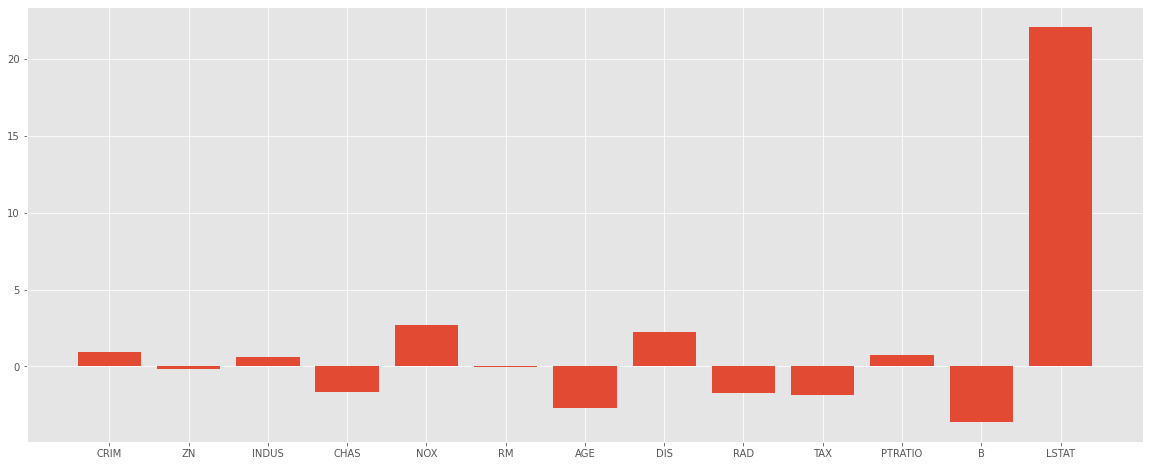

In [ ]:
plt.figure(figsize=(20, 8))
plt.bar(X.columns, my_reg_3_4.coef()[1:])

**Вывод:** Основываясь на том, что разница train MSE и test MSE практически не изменилась, и сами значения MSE для полной и усеченной выборки мало отличаются. При удалении некоторых признаков качество предсказания модели не сильно изменилось, значит мы можем от них избавиться ускорив обработку данных без вреда качеству.